In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/usr/local/lib/python2.7/dist-packages/matplotlib-2.0.0b1-py2.7-linux-x86_64.egg/matplotlib/__init__.py:895: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
feat = pd.read_csv('../data/Paticlulate Composite.csv', header = None)

In [3]:
feat.head()

,0,1,2,3
0,4.280000e+09,0.404,7.490000e+11,0.336
1,5.790000e+09,0.409,1.630000e+11,0.296
2,7.400000e+09,0.405,1.520000e+11,0.345
3,8.840000e+09,0.423,6.100000e+11,0.333
4,3.960000e+09,0.400,2.620000e+11,0.338


In [4]:
feat.shape

(100, 4)

In [5]:
feat.columns = ['E_m', 'Nu_m', 'E_p', 'Nu_p']

In [6]:
stress = pd.read_csv('../data/Stress Data 1 Extended (100X100).dat', delim_whitespace=True, header=None)

In [7]:
stress.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,11700000.0,23400000.0,35000000.0,46600000.0,58100000.0,69500000.0,80900000.0,92300000.0,104000000.0,115000000.0,...,8.730000e+08,8.800000e+08,8.880000e+08,8.960000e+08,9.040000e+08,9.110000e+08,9.190000e+08,9.260000e+08,9.340000e+08,9.410000e+08
1,16300000.0,32600000.0,48700000.0,64800000.0,80800000.0,96800000.0,113000000.0,128000000.0,144000000.0,160000000.0,...,1.220000e+09,1.230000e+09,1.240000e+09,1.250000e+09,1.260000e+09,1.270000e+09,1.280000e+09,1.290000e+09,1.300000e+09,1.310000e+09
2,20100000.0,40100000.0,60000000.0,79800000.0,99500000.0,119000000.0,139000000.0,158000000.0,177000000.0,197000000.0,...,1.500000e+09,1.510000e+09,1.530000e+09,1.540000e+09,1.550000e+09,1.570000e+09,1.580000e+09,1.590000e+09,1.600000e+09,1.620000e+09
3,28700000.0,57200000.0,85600000.0,114000000.0,142000000.0,170000000.0,198000000.0,226000000.0,253000000.0,281000000.0,...,2.120000e+09,2.140000e+09,2.160000e+09,2.180000e+09,2.200000e+09,2.220000e+09,2.240000e+09,2.250000e+09,2.270000e+09,2.290000e+09
4,10600000.0,21100000.0,31500000.0,41900000.0,52300000.0,62600000.0,72900000.0,83100000.0,93200000.0,103000000.0,...,7.870000e+08,7.940000e+08,8.010000e+08,8.080000e+08,8.150000e+08,8.210000e+08,8.280000e+08,8.350000e+08,8.420000e+08,8.490000e+08


In [8]:
stress.shape

(100, 100)

In [9]:
strain = pd.read_csv('../data/Strain Data 1 (1X100).dat', delim_whitespace=True, header = None)

In [10]:
strain.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.001001,0.002002,0.003004,0.004008,0.005012,0.006018,0.007025,0.008032,0.00904,0.01005,...,0.095141,0.096232,0.097324,0.098418,0.099513,0.100608,0.101705,0.102802,0.103901,0.105


In [11]:
strain.shape

(1, 100)

In [12]:
stress = pd.DataFrame(stress.values.reshape(stress.shape[0]*stress.shape[1],1))

In [13]:
strain = pd.DataFrame(strain.values.reshape(strain.shape[1], strain.shape[0]))

In [14]:
feat['merge_on'] = feat.index

In [15]:
strain['merge_on'] = strain.index

In [16]:
stress['merge_on'] = stress.index

In [17]:
stress['merge_on'] = stress['merge_on']/100

In [18]:
stress['merge_on'] = stress['merge_on'].astype(int)

In [19]:
stress.columns = ['stress', 'merge_on']

In [20]:
strain.columns = ['strain', 'merge_on']

In [21]:
data = pd.merge(stress, feat, on = 'merge_on', how = 'left')

In [22]:
data['merge_on'] = (stress.index)%100

In [23]:
data = pd.merge(data, strain, on = 'merge_on', how = 'left')

In [24]:
feat.drop('merge_on', axis = 1, inplace=True)
stress.drop('merge_on', axis = 1, inplace=True)
strain.drop('merge_on', axis = 1, inplace=True)
data.drop('merge_on', axis = 1, inplace=True)

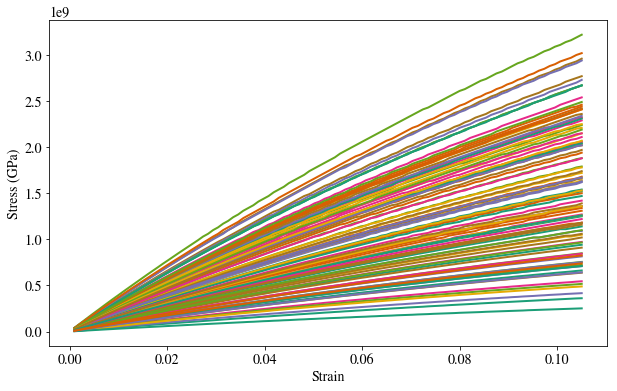

In [25]:
for i in range(100):
    plt.plot(data.iloc[i*100:100*(i+1)]['strain'],data.iloc[i*100:100*(i+1)]['stress'])
plt.xlabel('Strain')
plt.ylabel('Stress (GPa)')
plt.show()

In [26]:
features = data[['E_m', 'Nu_m', 'E_p', 'Nu_p', 'strain']]
target = data['stress']

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score

In [28]:
lm = LinearRegression()
np.mean(cross_val_score(lm, features, target, cv = 5))

0.87565724941711276

In [29]:
rf = RandomForestRegressor()
print np.mean(cross_val_score(rf, features, target.values.ravel(), cv=10, scoring='r2'))

0.977701995406


In [63]:
x_train = features.iloc[0:99*100]
y_train = target.iloc[0:99*100]

x_test = features.iloc[99*100:100*100]
y_test = target.iloc[99*100:100*100]

In [82]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
predicted = rf.predict(x_test)
print r2_score(y_test, predicted)

0.98609176662


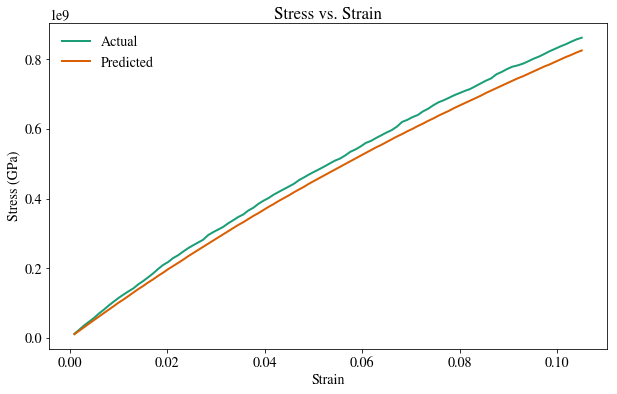

In [87]:
plt.plot(x_test['strain'], predicted)
plt.plot(x_test['strain'], y_test)
plt.title('Stress vs. Strain')
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Strain')
plt.ylabel('Stress (GPa)')
plt.show()